# Digital content and entertainment industry

The objective is to build a text classification model that
analyses the customer's sentiments based on their reviews in the IMDB database.

In [ ]:
import tensorflow as tf

## Loading and analysing the data

In [ ]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


### Printing first 5 reviews

In [ ]:
for i in range(5):
    print('Review:', train_data[i])
    print('Label:', train_label[i])
    print('_' * 10)

Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1
__________
Review: [1, 194, 1153, 194, 8255

We see that the text of the review has been encoded as a sequence of integers. Each word in the text is represented as an integer. A dictionary called the **vocabulary** links each word to a unique integer.

To decode the review, we need to make use of the vocabulary:

In [ ]:
review_words = tf.keras.datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
vocabulary = {k: (v + 3) for k, v in review_words.items()} 

vocabulary["<PAD>"] = 0
vocabulary["<START>"] = 1
vocabulary["<UNKNOWN>"] = 2
vocabulary["<UNUSED>"] = 3

index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    return ' '.join([index.get(i, '?') for i in text])

### Printing first 5 reviews with decoded text

In [ ]:
for i in range(5):
    print('Review:', decode_review(train_data[i]))
    print('Label:', train_label[i])
    print('_' * 10)

Review: <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKNOWN> is an amazing actor and now the same being director <UNKNOWN> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKNOWN> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKNOWN> to the two little boy's that played the <UNKNOWN> of norman and paul they were just brilliant children are often left out of the <UNKNOWN> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazi

### Padding Sequence on the sentence

Making all sentences of equal length

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                           value=vocabulary["<PAD>"],
                                                           padding='post',
                                                           maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                          value=vocabulary["<PAD>"],
                                                          padding='post',
                                                          maxlen=256)

### Analysis on the data

In [ ]:
print('Shape of training data:', train_data.shape)
print('Shape of testing data:', test_data.shape)

Shape of training data: (25000, 256)
Shape of testing data: (25000, 256)


In [ ]:
print('Shape of training label:', train_label.shape)
print('Shape of testing label:', test_label.shape)

Shape of training label: (25000,)
Shape of testing label: (25000,)


In [ ]:
print('Feature:', train_data[55])
print('Original Sentence:', decode_review(train_data[55]))
print('Label:', train_label[55])

Feature: [2467   17    6  959    4   65    9    6  947   14   20 1481 3827   19
  559    5   12  434  152 4392   19 2448 4719   10   10   13   92 6110
   15    6  171  388    7 1092    2    5  831 9332   26 8813  469   14
  196  196   22   21  148    2    2    2  541  110 3727   11  117    2
 5567   26 1755    5 1322    5  718    2 3149 4349  411 4922  146  344
    5    2 1806 1533    2    4 1327  905 1074    5    2   94 1321 1708
   13  124   13 1829   11    4  750    5  557    4  311  462   11  700
 2143    2 1264   75   92   28    8  193   14  538  615  417 5011    9
  340   33 2019   42  334 1254 3071  315  148  139   11   63 4922 5933
  187    4 1896 1455  137   41  658  497    8    2   68  492    6    2
  368    7    2 5540   32 1266   50  351   11   68 1073 6088    2  150
   13   66  244 1595   10   10  348  718    2 3499  120    4  153   31
   70   64 2237   15   29  520   43    4  432    7    2 2660    2    2
 1385    2  239   15    4  167  473    4  239    7 4708 6062   17   

## Design, train and tune model

### Apporach 1: Using Vanilla LSTM

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(10000, 32, input_length=256))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 149s 375ms/step - loss: 0.6915 - accuracy: 0.5386 - val_loss: 0.6709 - val_accuracy: 0.5521
Epoch 2/10
391/391 [==============================] - 146s 374ms/step - loss: 0.6473 - accuracy: 0.6030 - val_loss: 0.6647 - val_accuracy: 0.5526
Epoch 3/10
391/391 [==============================] - 146s 373ms/step - loss: 0.6343 - accuracy: 0.5919 - val_loss: 0.6314 - val_accuracy: 0.5980
Epoch 4/10
391/391 [==============================] - 146s 374ms/step - loss: 0.6118 - accuracy: 0.6300 - val_loss: 0.6678 - val_accuracy: 0.5799
Epoch 5/10
391/391 [==============================] - 146s 374ms/step - loss: 0.6038 - accuracy: 0.6500 - val_loss: 0.6634 - val_accuracy: 0.5570
Epoch 6/10
391/391 [==============================] - 146s 374ms/step - loss: 0.6037 - accuracy: 0.6438 - val_loss: 0.6448 - val_accuracy: 0.5934
Epoch 7/10
391/391 [==============================] - 146s 373ms/step - loss: 0.5243 - accuracy: 0.7489 - val_loss: 0.7081 -

### Apporach 2: Using Stacked LSTM

In [ ]:
stacked_model = tf.keras.models.Sequential()
stacked_model.add(tf.keras.layers.Embedding(10000, 32, input_length=256))
stacked_model.add(tf.keras.layers.LSTM(100, return_sequences=True))
stacked_model.add(tf.keras.layers.LSTM(100))
stacked_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(stacked_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256, 100)          53200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 453,701
Trainable params: 453,701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
stacked_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
stacked_model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 302s 765ms/step - loss: 0.6933 - accuracy: 0.5426 - val_loss: 0.6903 - val_accuracy: 0.5193
Epoch 2/10
391/391 [==============================] - 299s 764ms/step - loss: 0.6397 - accuracy: 0.6281 - val_loss: 0.6670 - val_accuracy: 0.5653
Epoch 3/10
391/391 [==============================] - 298s 763ms/step - loss: 0.5727 - accuracy: 0.6931 - val_loss: 0.5645 - val_accuracy: 0.7330
Epoch 4/10
391/391 [==============================] - 298s 762ms/step - loss: 0.4655 - accuracy: 0.7843 - val_loss: 0.5056 - val_accuracy: 0.7542
Epoch 5/10
391/391 [==============================] - 298s 762ms/step - loss: 0.4285 - accuracy: 0.8162 - val_loss: 0.4538 - val_accuracy: 0.8111
Epoch 6/10
391/391 [==============================] - 298s 762ms/step - loss: 0.3880 - accuracy: 0.8293 - val_loss: 0.4273 - val_accuracy: 0.8146
Epoch 7/10
391/391 [==============================] - 298s 762ms/step - loss: 0.3634 - accuracy: 0.8503 - val_loss: 0.4148 -

### Apporach 3: Using Bidirectional LSTM

In [ ]:
bidirectional_model = tf.keras.models.Sequential()
bidirectional_model.add(tf.keras.layers.Embedding(10000, 32, input_length=256))
bidirectional_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)))
bidirectional_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(bidirectional_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 426,601
Trainable params: 426,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
bidirectional_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
bidirectional_model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 231s 584ms/step - loss: 0.6918 - accuracy: 0.5549 - val_loss: 0.6736 - val_accuracy: 0.6233
Epoch 2/10
391/391 [==============================] - 228s 582ms/step - loss: 0.4901 - accuracy: 0.7714 - val_loss: 0.3916 - val_accuracy: 0.8356
Epoch 3/10
391/391 [==============================] - 228s 584ms/step - loss: 0.2923 - accuracy: 0.8857 - val_loss: 0.3636 - val_accuracy: 0.8451
Epoch 4/10
391/391 [==============================] - 229s 586ms/step - loss: 0.2190 - accuracy: 0.9175 - val_loss: 0.3542 - val_accuracy: 0.8638
Epoch 5/10
391/391 [==============================] - 228s 584ms/step - loss: 0.1653 - accuracy: 0.9425 - val_loss: 0.3836 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 227s 580ms/step - loss: 0.1245 - accuracy: 0.9586 - val_loss: 0.4479 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 227s 580ms/step - loss: 0.1043 - accuracy: 0.9659 - val_loss: 0.4636 -

#### Conclusion:
Among the 3 approaches, we can clearly see that Bidirectional LSTM is working best. 

In [20]:
predictions = bidirectional_model.predict(test_data)

In [49]:
pred_round = np.round(predictions)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

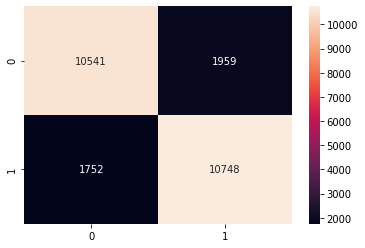

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(test_label, pred_round), annot=True, fmt='g')
plt.show()

#### Observations:
1. Most of the predictions are correct and model is performing almost similar for both the classes.

### Predictions

In [45]:
import numpy as np

In [67]:
rnd = np.random.randint(0, 100, size=10)
for i in rnd:
    print('Review:', decode_review(train_data[i]))
    print('Label:', train_label[i])
    print('Predicted:', int(np.round(predictions[i])))
    print('_' * 100)

Review: <START> really truly <UNKNOWN> <UNKNOWN> awful but actor <UNKNOWN> moore the movie lone ranger <UNKNOWN> himself competently as an actor he's the only one br br a rare treat for five minutes if you want to <UNKNOWN> the depths of <UNKNOWN> transparent special effects southern california as the moon again and again and again and acting so <UNKNOWN> inept that it may be a spoof except that it's clear that it isn't no humor here except unintentionally br br the dialogue may be worse than any of these other aspects and the costumes well enough said plot what plot bad guy well head bad guy and his henchmen including his <UNKNOWN> agent called <UNKNOWN> listen carefully or you'll suspect it's a spoof on the name of <UNKNOWN> <UNKNOWN> ray <UNKNOWN> and his unbelievably inept <UNKNOWN> who however have <UNKNOWN> that never need <UNKNOWN> as does <UNKNOWN> cody so there are numerous <UNKNOWN> <UNKNOWN> br br enjoy <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

#### Conclusion:
As we can see in the above, out of 10, only 4 were incorrect predictions. The model is working good and can be improved by tuning the parameter and we can increase number of features as well to improve.